Table containing average weight of MST for each number of vertices (rows) and dimension (columns).

In [196]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Get data from text file
data = pd.read_csv('Results.txt', sep=" ", header=None)
data.columns = ["Average", "Vertices", "Numtrials", "Dimension"]

In [201]:
# Set up table and input values
results = pd.DataFrame(index=data.Vertices.unique())

for index, row in data.iterrows():
    results.at[row["Vertices"], int(row["Dimension"])] = row["Average"]

In [199]:
display(results)

,0,2,3,4
128,1.193014,7.856897,17.911430,29.034003
256,1.324428,10.777100,28.073343,47.538452
512,1.199440,15.139077,43.458672,78.417895
1024,1.209747,21.060721,68.452173,131.154295
2048,1.255195,29.723217,107.062174,215.619144
4096,1.198707,41.791153,168.704937,361.993279
8192,1.194838,58.828339,267.195338,602.501254
16384,1.208147,83.148856,421.725459,1008.972946
32768,1.201239,117.684403,667.914893,1687.581336
65536,1.207431,165.938705,1058.887729,2829.519605


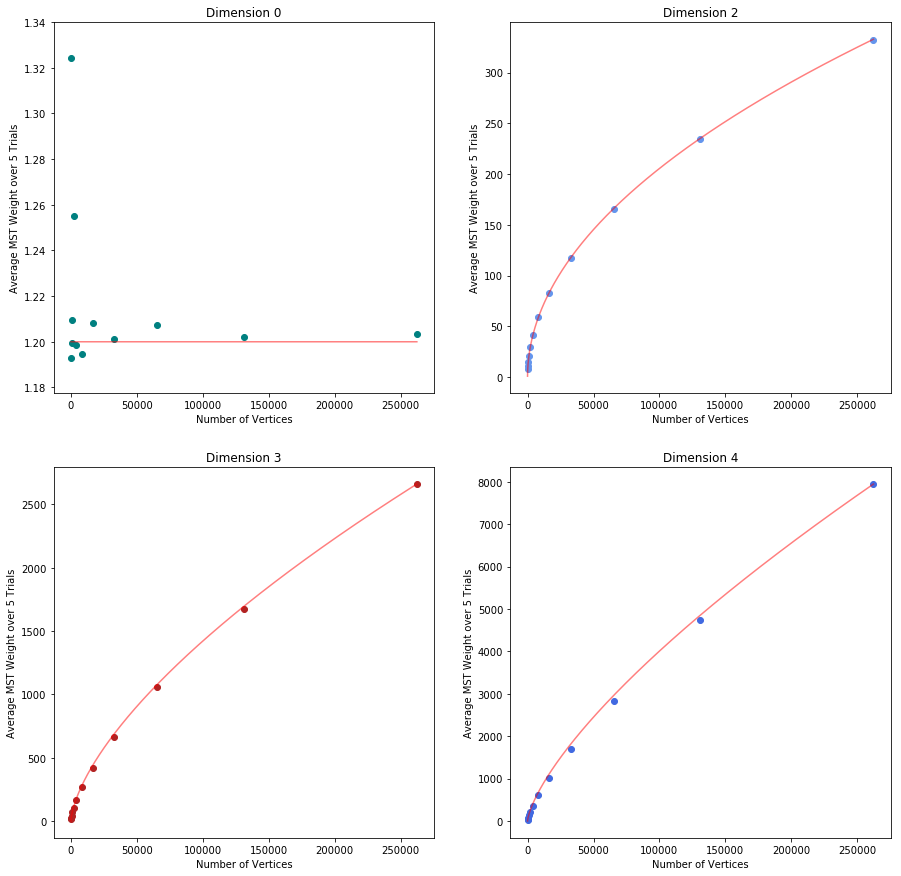

In [200]:
# Plot for each dimension of average vs size
colors = ['teal', 'cornflowerblue', 'firebrick', 'royalblue']
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# linearly spaced numbers between 2 and 262144
#    we skip 0 and 2 to avoid divide by zero when 
#    using logarithms, fractions, etc.
x = np.linspace(2,262144,262144)

# the function guesses for each dimension
y0 = [1.2]*262144
y2 = np.sqrt(x)*0.65
y3 = pow(x, 0.65)*0.8
y4 = pow(x, 0.71)*1.13

# make plot for each dimension
for dimension, y, ax, clr in zip([0, 2, 3, 4], [y0, y2, y3, y4], axs.ravel(), colors):
    subset = data[data['Dimension'] == dimension]
    ax.scatter(subset.Vertices, subset.Average, color=clr, alpha=1)
    ax.set(title='Dimension ' + str(dimension), xlabel='Number of Vertices',
           ylabel='Average MST Weight over 5 Trials')
    ax.plot(x,y,'r', alpha=0.5)
#     ax.set_xscale("log")
#     ax.set_yscale("log")

plt.show()